In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Loading cleaned version of Dataset

df = pd.read_csv('cleaned_loan_default.csv')

## Encoding Categorical Columns

I have convert all categorical columns into numerical values using one hot encoding.
This is required because machine learning models such as Logistic Regression and Decision Tree cannot work with text labels.

I am using pd.get_dummies() to ensure safe and simple encoding.

In [12]:
# Dropping the ID column because it is not useful in prediction

df = df.drop(columns='ID')

In [13]:
# Encoding Features

df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
df_encoded.shape

(148670, 47)

In [15]:
df_encoded.head()

,year,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_ncf,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,2019,116500,360.0,118000.0,1740.0,758,98.728814,1,45.0,False,...,False,False,False,False,False,True,False,False,True,True
1,2019,206500,360.0,418000.0,4980.0,552,75.135870,1,39.0,False,...,False,True,False,False,False,True,False,False,False,True
2,2019,406500,360.0,508000.0,9480.0,834,80.019685,0,46.0,False,...,False,False,False,False,False,True,False,False,True,True
3,2019,456500,360.0,658000.0,11880.0,587,69.376900,0,42.0,False,...,True,False,False,False,False,False,False,False,False,True
4,2019,696500,360.0,758000.0,10440.0,602,91.886544,0,39.0,False,...,False,False,False,False,False,False,False,False,False,True


## Train–Test Split

I have separate the data into features (X) and target (y) and then split it into training and testing sets.
The training set is used to fit the model, and the test set is used to evaluate how well the model generalizes to unseen data.

In [ ]:
X = df_encoded.drop(columns='Status', axis=1) # assigning all features to X
Y = df_encoded['Status'] # assigining target variable to Y

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # Splitting the data for training and testing

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((118936, 46), (29734, 46), (118936,), (29734,))

## Train Logistic Regression Model

I have train a Logistic Regression model to predict loan default.
This algorithm works well for binary classification problems like default vs non default.
I have first scale the numeric features for better performance then fit the model and generate predictions.

In [19]:
scaler = StandardScaler() # Scaling 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)

Y_pred_log = log_reg.predict(X_test_scaled)

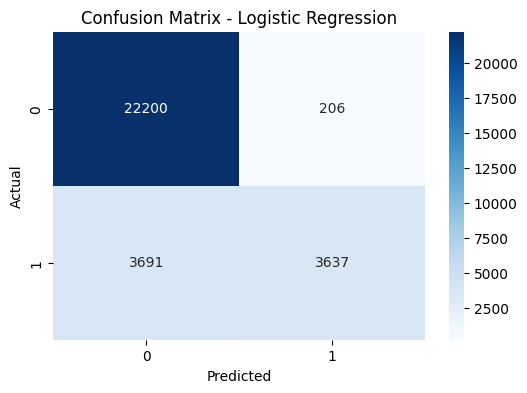

In [20]:
# Evaluation

# Confusion Matrix:
cm_log = confusion_matrix(Y_test, Y_pred_log)

# Confusion Matrix HeatMap:
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Report & Accuracy

print("Classification Report - Logistic Regression:")
print(classification_report(Y_test, Y_pred_log))

log_reg_accuracy = accuracy_score(Y_test, Y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}% ")


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22406
           1       0.95      0.50      0.65      7328

    accuracy                           0.87     29734
   macro avg       0.90      0.74      0.79     29734
weighted avg       0.88      0.87      0.85     29734

Logistic Regression Accuracy: 86.89% 


## Train Decision Tree Classifier

I have train a Decision Tree classifier as well on the same train test split.
Decision Trees can capture non linear patterns and don’t require feature scaling so that's why I train this as well to see which model performs better.


In [22]:

dt = DecisionTreeClassifier(random_state=42, max_depth=5)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)

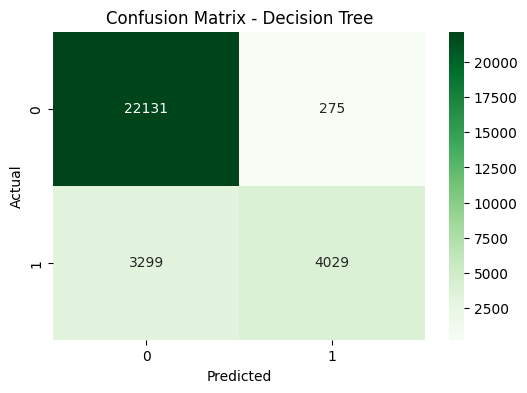

In [23]:
# Evaluation

# Confusion Matrix

cm_dt = confusion_matrix(Y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Classification Report

print("Classification Report - Decision Tree:")
print(classification_report(Y_test, y_pred_dt))

# Accuracy
dt_accuracy = accuracy_score(Y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}% ")

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     22406
           1       0.94      0.55      0.69      7328

    accuracy                           0.88     29734
   macro avg       0.90      0.77      0.81     29734
weighted avg       0.89      0.88      0.87     29734

Decision Tree Accuracy: 87.98% 


## Accuracy Comparison 

I have compare Logistic Regression and Decision Tree based on their accuracy using a bar chart.

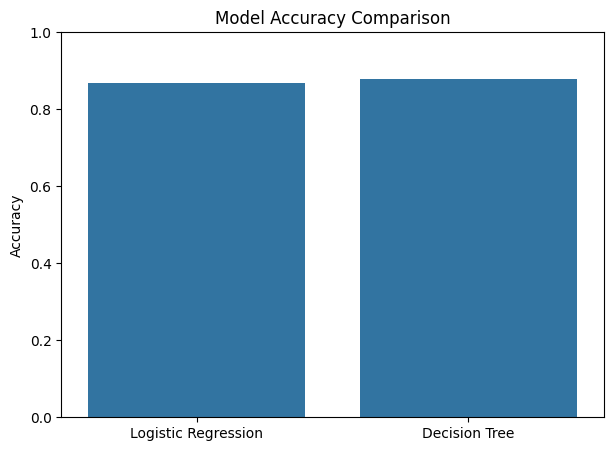

In [25]:
# Accuracy Comparison Bar Plot
model_names = ['Logistic Regression', 'Decision Tree']
accuracies = [log_reg_accuracy, dt_accuracy]

plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

Both models performed well but the Decision Tree achieved slightly higher accuracy proving that the relationships in this dataset are non linear and better captured by a tree based model.
However, Logistic Regression still delivered strong performance and gives more interpretable coefficients.